# sklearnを使ってk-meansを試してみる

## データの読み込みと可視化

seabornという可視化ライブラリから、iris dataを読み込んで可視化までしてみます。

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris") 

# ちなみにこのirisはpandasのdataframeです。

iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


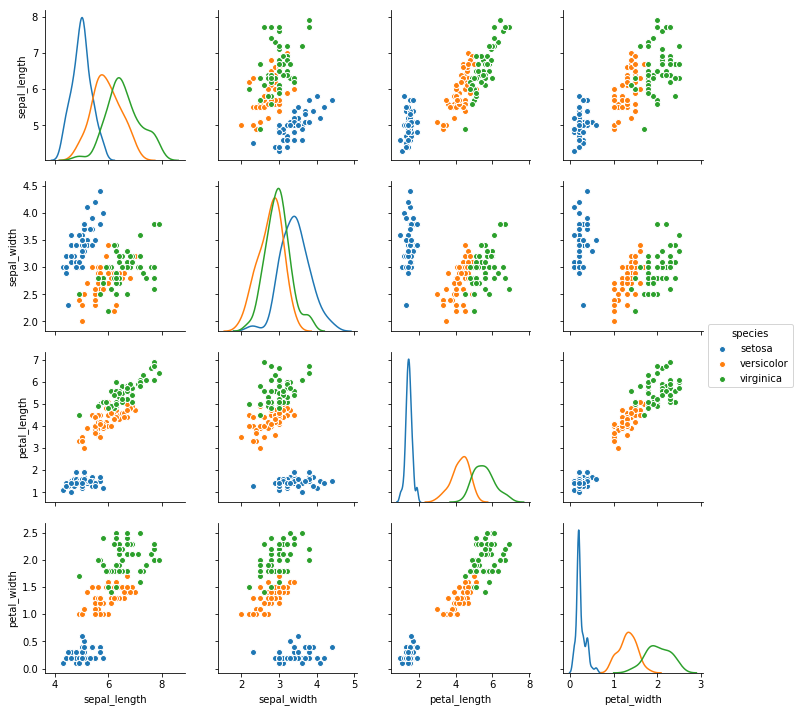

In [3]:
sns.pairplot(iris, hue = "species", diag_kind="kde")

## sklearn.cluster.KMeansを使ってクラスタリング

sklearnのKmeansでクラスタリングを行います。

ここで、KMeansの引数は
- n_clusters: クラスタの数
- max_iter: 学習のループ回数
- inin: 平均の初期値の決め方
- n_jobs: k-meansを何並列にするか(-1ならばpcのコア数分だけ並列してくれます）

In [4]:
from sklearn.cluster import KMeans

1.KMeansのインスタンスを作成

In [5]:
kmeans = KMeans(n_clusters=3, max_iter=30, init="random", n_jobs=-1)

2.インスタンスを使ってデータをクラスタリング

In [6]:
cluster = kmeans.fit_predict(iris.values[:,0:4])

In [7]:
iris2 = iris.iloc[:,[0,1,2,3]]
iris2["cluster"] = ["cluster"+str(x) for x in cluster]

iris2.head(20)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,cluster1
1,4.9,3.0,1.4,0.2,cluster1
2,4.7,3.2,1.3,0.2,cluster1
3,4.6,3.1,1.5,0.2,cluster1
4,5.0,3.6,1.4,0.2,cluster1
5,5.4,3.9,1.7,0.4,cluster1
6,4.6,3.4,1.4,0.3,cluster1
7,5.0,3.4,1.5,0.2,cluster1
8,4.4,2.9,1.4,0.2,cluster1
9,4.9,3.1,1.5,0.1,cluster1


## クラスタリング結果の可視化

最初の同じグラフを作って比較してみましょう。

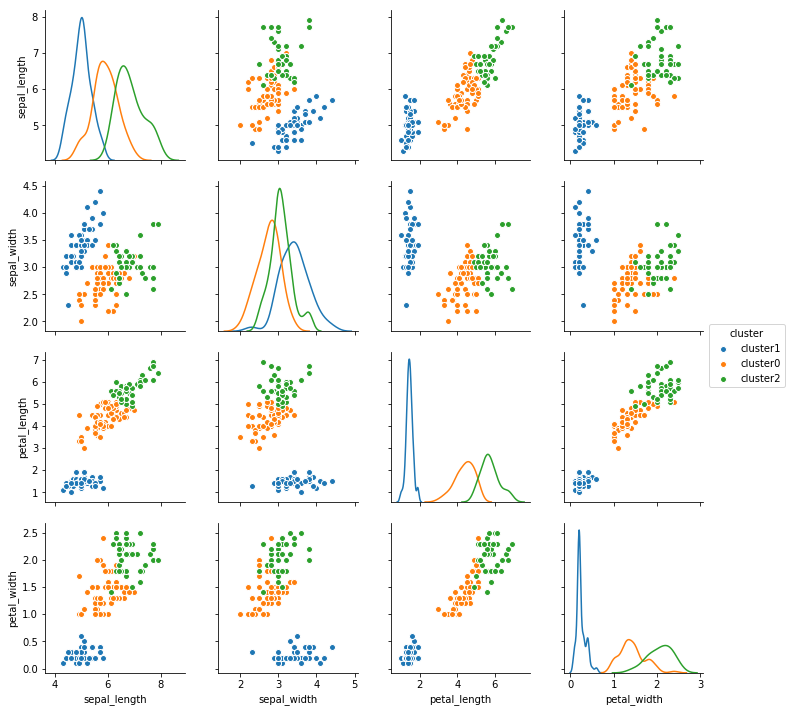

In [8]:
sns.pairplot(iris2, hue = "cluster", diag_kind="kde")